In [ ]:
#Notes
#In this notebook, you will find a compiled workload of 4 different datasets explored. 
#Through each data set explored we'll be solving some simple data exploration questions to get to know our data better. 
#Weight Data
#US Census Data
#Tips Data
#Avovado Sales Data


In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
#1.1 Import the data from the file weights.tsv into a Pandas Series object in Python.
df = pd.read_csv(r'C:\Users\Abana\OneDrive\Documents\ADS\ADS500B\Mod3\weights.csv')
print(df)

    Weights
0       164
1       158
2       172
3       153
4       144
5       156
6       189
7       163
8       134
9       159
10      143
11      176
12      177
13      162
14      141
15      151
16      182
17      185
18      171
19      152


In [3]:
#1.2 Create a new series object with weights converted to kilograms from pounds (1
#pound = 0.453592 kilograms). Round the results to two decimal places.

kg = (df) / 2.2046
print("The toal number of kilograms comes to: ",round(kg, 2))


The toal number of kilograms comes to:      Weights
0     74.39
1     71.67
2     78.02
3     69.40
4     65.32
5     70.76
6     85.73
7     73.94
8     60.78
9     72.12
10    64.86
11    79.83
12    80.29
13    73.48
14    63.96
15    68.49
16    82.55
17    83.92
18    77.57
19    68.95


In [4]:
#1.3. Find the mean, median, and standard deviation of both series objects usingPandas functions. 
#weight in pounds
print(df.mean())
print(df.median())
print(df.std())



Weights    161.6
dtype: float64
Weights    160.5
dtype: float64
Weights    15.449067
dtype: float64


In [5]:
#1.3. Find the mean, median, and standard deviation of both series objects usingPandas functions. 
#weight in kg
print(kg.mean())
print(kg.median())
print(kg.std())



Weights    73.301279
dtype: float64
Weights    72.802322
dtype: float64
Weights    7.007651
dtype: float64


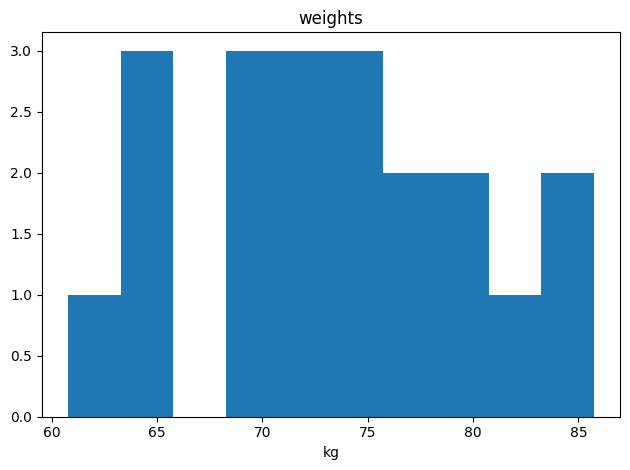

In [6]:
#1.4. Plot a histogram of weight (in kilograms) using matplotlib library with 10 bins.
plt.style.use('default')
plt.hist(kg, bins=10)
plt.title('weights')
plt.xlabel('kg')
plt.tight_layout()

In [5]:
#2.1. Import the dataset “boston.csv” into a Pandas dataframe and obtain the number of rows and columns for the dataframe. 
df = pd.read_csv(r'C:\Users\Abana\OneDrive\Documents\ADS\ADS500B\Mod3\boston.csv')
print (df)
df.head()

        CRIM    ZN   NDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
#2.2. What is the owner-occupied home value (MEDV) for the lowest nitric oxide concentration (NOX) from the dataframe?
df.loc[df['NOX'].idxmin()]['MEDV']

20.1

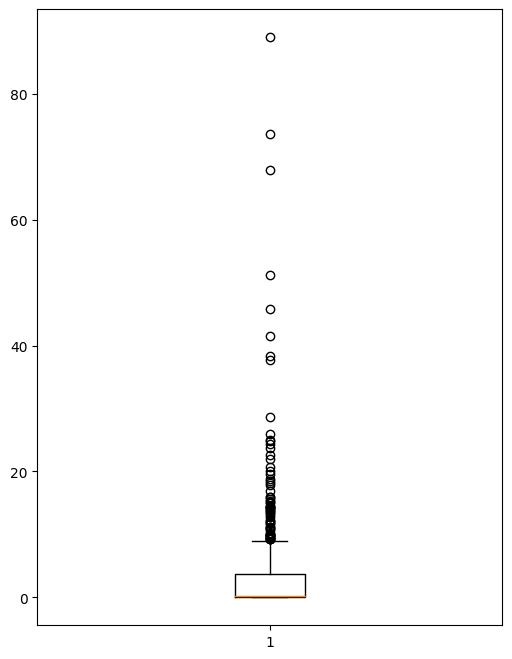

In [9]:
#2.3part1 Create a boxplot of per capita crime rate (CRIM) using Matplotlib. Obtain the interquartile
#range for crime rate (CRIM) using Pandas functions.
fig = plt.figure(figsize = (6,8))
plt.boxplot(df.CRIM)
plt.show()

In [10]:
#2.3part2
df.describe()
Q3 = df['CRIM'].quantile(0.75)
Q1 = df['CRIM'].quantile(0.25)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

3.6770825
0.08204499999999999
3.5950375


In [11]:
#2.4 part1
#Subset all columns of the dataframe for rows with outliers of crime rate into a new
#dataframe. Compare the mean of AGE between the two dataframes with respect
#to crime rate. 

Crime_outliers_df = df[df['CRIM'] > (1.5 *IQR + Q3)]
print('Average age' , df['AGE'].mean())
print('Average age for crime rate outliers' , Crime_outliers_df['AGE'].mean())


Average age 68.57490118577076
Average age for crime rate outliers 94.23333333333335


In [12]:
#2.4 part2
#what do you interpret?(Hint: Outliers exist 1.5 times of interquartile
#range above third quartile and below first quartile)
#interpretaion: It appears that the average age that crime rates have happened are in older neighborhoods. However there is still more research left to do. 

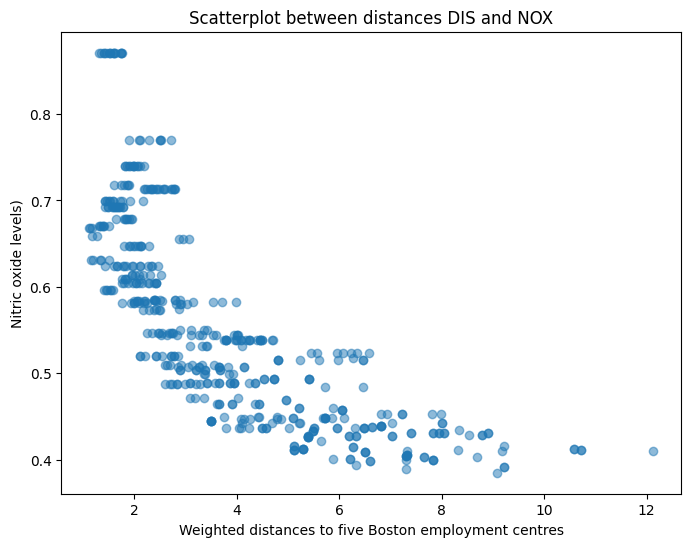

-0.7692301132258278


In [13]:
#2.5 part1
#Create scatterplot between distances to employment centers (DIS) and nitric
#oxide levels (NOX).Interpret their relation.

fig = plt.figure(figsize = (8,6))
plt.scatter(df['DIS'], df['NOX'], alpha=0.5)
plt.xlabel('Weighted distances to five Boston employment centres')
plt.ylabel('Nitric oxide levels)')
plt.title('Scatterplot between distances DIS and NOX')
plt.show()

#Obtain correlation index between the two columns 
column_1 = df["DIS"]
column_2 = df["NOX"]
correlation = column_1.corr(column_2)
print(correlation)

In [14]:
#2.5 part2
#interpret their relation.
#interpretaion: Based on the scatter plot and the correlation we can say that there is a strong negative correlation between these two variables.
#In conclusion the closer the center the higher oxide levels are.

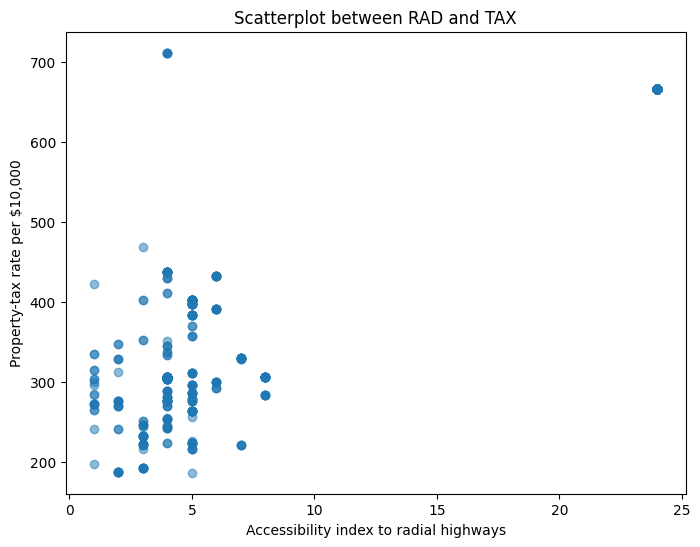

0.9102281885331845


In [15]:
#2.6 part1
#Similarly, create a scatterplot between highway accessibility index (RAD) and
#property tax rate (TAX). Obtain correlation index, compare it to the scatter-plot,
#and interpret the relation between RAD and TAX.
fig = plt.figure(figsize = (8,6))
plt.scatter(df['RAD'], df['TAX'], alpha=0.5)
plt.xlabel('Accessibility index to radial highways')
plt.ylabel('Property-tax rate per $10,000')
plt.title('Scatterplot between RAD and TAX')
plt.show()
#Obtain correlation index
column_1 = df["RAD"]
column_2 = df["TAX"]
correlation = column_1.corr(column_2)
print(correlation)

In [16]:
#2.6 part2
#Correlation was strong, however lets see what would happen if we take the outliers out. 
tax_subset_df = df[df['TAX'] < 600]
tax_subset_df 

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


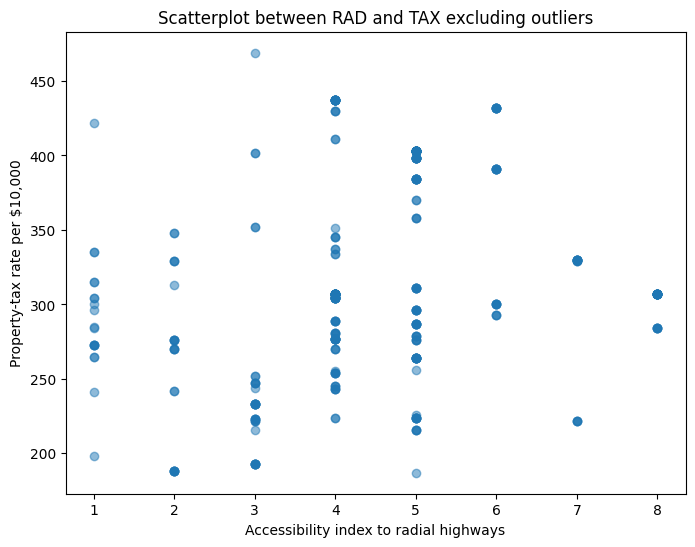

In [17]:
# scatterplot between RAD and TAX after removing outliers
fig = plt.figure(figsize = (8,6))
plt.scatter(tax_subset_df['RAD'],tax_subset_df['TAX'], alpha=0.5)
plt.xlabel('Accessibility index to radial highways')
plt.ylabel('Property-tax rate per $10,000')
plt.title('Scatterplot between RAD and TAX excluding outliers')
plt.show()

In [18]:
#Correlation test after removing outliers
tax_subset_df['RAD'].corr(tax_subset_df['TAX'])

0.24975731331429218

In [19]:
#interpretaion: Based on the correlation and removing outliers, it is safe to say this is a negative postive correlation between these two variables.

In [3]:
tips_df = sns.load_dataset('tips')
#tips_df.head()
print(tips_df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [4]:
#3.1 part 1
#Calculate percentage of tip amounts for bill totals, rounded to two decimal places
#and create a new column “tip_percent” in the same dataframe.
tips_df['tip_percent'] = round((tips_df['tip']*100)/tips_df['total_bill'],2)
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [22]:
#3.2 part 1
#For what days in the week do we have the data, and which day has the highest bill mean?
tips_df.get("day")
#interpretaion: It appears that we have the data thursday- Sunday

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [8]:
#3.2 part 2
tips_df.groupby('day', as_index=False)['total_bill'].mean()
#interpretaion: It appears that on average Sunday is the day where the highest bill is $21.41

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


In [9]:
#3.3 part 1
#Are there more dinners or lunches? Create a dataframe with this data. Are there more smokers during lunches or dinners?
time_counts_df = pd.DataFrame(tips_df['time'].value_counts())
time_counts_df

#interpretaion: It appears there are more dinners than lunchs

,time
Dinner,176
Lunch,68


In [10]:
#3.3 part 2
#Are there more smokers during lunches or dinners?
smoker_counts_df = pd.DataFrame(tips_df[tips_df['smoker']=='Yes'].
groupby('time')['smoker'].count())
smoker_counts_df
#interpretaion: Based on the results there are more dinner smokers than there are luch smokers.

,smoker
time,
Lunch,23
Dinner,70


In [11]:
common_counts_df = time_counts_df.join(smoker_counts_df)
common_counts_df

,time,smoker
Dinner,176,70
Lunch,68,23


In [12]:
#3.3 part 3
#Join the two dataframes by time of day and calculate the percent of smokers at lunch and dinner. Compare the results.
common_counts_df['smoker_percent'] = round((common_counts_df['smoker']*100)/ common_counts_df['time'],2)
common_counts_df

,time,smoker,smoker_percent
Dinner,176,70,39.77
Lunch,68,23,33.82


In [ ]:
#3.3 part 4
#interpretaion
#Based on our discovery there is a higher percentage of people who smoke more during dinner than lunch.

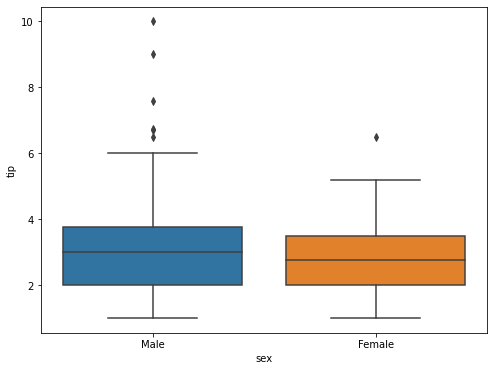

In [13]:
#3.4 part 1 Using the boxplot function from seaborn package, create plots on “tip” column for Male and
#Female from “sex” column. Compare the boxplots and provide your interpretation on outliers
#between males and females.

fig = plt.figure(figsize = (8,6))
sns.boxplot(x='sex', y='tip', data=tips_df) # this code line is sufficient
plt.show()

In [ ]:
#3.4 part 2
#interpretaion
#It appears that femles have more of a consistent amount of tipping than men. Where Males a have a higher spread of tipping. This shows that perhaps men tip more than women.

<AxesSubplot:xlabel='sex', ylabel='tip_percent'>

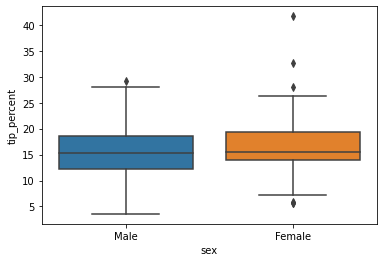

In [14]:
#3.5 part 1
sns.boxplot(x='sex', y='tip_percent', data=tips_df[tips_df['tip_percent']<70])

In [ ]:
#3.5 part 2
#interpretaion
#It appers in this case there is more of a normal distribution for men. However,females have more of an outlier in this case.

In [27]:

#Question 4.1
#Import the dataset file into a Pandas dataframe identify the count of missing values per column.Handle missing values based on column type and explain your reasons behind
#selecting appropriate techniques.
avocado = pd.read_csv(r'C:\Users\Abana\OneDrive\Documents\ADS\ADS500B\Mod3\avocado.csv')
print (avocado)


             Date  AveragePrice  TotalVolume    Small      Large  AllSizes  \
0      2015-12-27          1.33     64236.62  1036.74   54454.85     48.16   
1      2015-12-20          1.35     54876.98   674.28   44638.81     58.33   
2      2015-12-13          0.93    118220.22   794.70  109149.67       NaN   
3      2015-12-06          1.08     78992.15  1132.00   71976.41     72.58   
4      2015-11-29          1.28     51039.60   941.48   43838.39     75.78   
...           ...           ...          ...      ...        ...       ...   
18244  2018-02-04          1.63     17074.83  2046.96    1529.20      0.00   
18245  2018-01-28          1.71     13888.04  1191.70    3431.50      0.00   
18246  2018-01-21          1.87     13766.76  1191.92    2452.79    727.94   
18247  2018-01-14          1.93     16205.22  1527.63    2981.04    727.01   
18248  2018-01-07          1.62     17489.58  2894.77    2356.13    224.53   

       TotalBags          Type    Year            Region  
0   

In [17]:
#Question 4.1part2
#identify the count of missing values per column.
avocado.isna().sum()

Date            176
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year            196
Region          169
dtype: int64

In [28]:
#Question 4.1 part 3
avocado.dropna(subset=['Date','Type','Region'], inplace=True)
#Reasoning is because date, type,region are not numerical.

In [21]:
avocado.isna().sum()

Date              0
AveragePrice    176
TotalVolume     186
Small           188
Large           174
AllSizes        176
TotalBags       174
Type              0
Year            192
Region            0
dtype: int64

In [29]:
avocado['Date']= pd.to_datetime(avocado['Date'])

In [32]:
avocado['Year'].fillna(avocado['Date'].dt.year, inplace=True)

In [36]:
avocado.isna().sum()


Date              0
AveragePrice    176
TotalVolume     186
Small           188
Large           174
AllSizes        176
TotalBags       174
Type              0
Year              0
Region            0
dtype: int64

In [37]:
avocado.describe()


,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Year
count,17528.000000,1.751800e+04,1.751600e+04,1.753000e+04,1.752800e+04,1.753000e+04,17704.000000
mean,1.405796,8.399542e+05,2.886808e+05,2.906704e+05,2.243454e+04,2.372994e+05,2016.147085
std,0.402154,3.412748e+06,1.248479e+06,1.185857e+06,1.055681e+05,9.779530e+05,0.939958
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.082740e+04,8.519325e+02,2.999282e+03,0.000000e+00,5.047165e+03,2015.000000
50%,1.370000,1.070161e+05,8.540210e+03,2.897685e+04,1.828950e+02,3.939211e+04,2016.000000
75%,1.660000,4.315678e+05,1.100946e+05,1.487283e+05,6.185715e+03,1.106583e+05,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,2018.000000


In [40]:
#Since the numerical coulmns are skeweed we'll replace them with the meadian.
avocado['AveragePrice'].fillna(avocado['AveragePrice'].median(),inplace=True)
avocado['TotalVolume'].fillna(avocado['TotalVolume'].median(),inplace=True)
avocado['Small'].fillna(avocado['Small'].median(), inplace=True)
avocado['Large'].fillna(avocado['Large'].median(), inplace=True)
avocado['AllSizes'].fillna(avocado['AllSizes'].median(), inplace=True)
avocado['TotalBags'].fillna(avocado['TotalBags'].median(), inplace=True)

In [41]:
#Checking to see if the missing values have been taken care of and as you see they have.
avocado.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
Small           0
Large           0
AllSizes        0
TotalBags       0
Type            0
Year            0
Region          0
dtype: int64

In [42]:
#4.2 part 1 Convert the fields Type, Year and Region to categorical data type and subset the dataframe to
#exclude regions “West” and “TotalUS”. In addition add a new column “Month” derived from date.Is the mean price of an avocado higher in 2017 compared to
#2016?
avocado["Type"] = avocado["Type"].astype('category')
avocado["Year"] = avocado["Year"].astype('int32'). astype('category')
avocado["Region"] = avocado["Region"].astype('category')
avocado.dtypes

Date            datetime64[ns]
AveragePrice           float64
TotalVolume            float64
Small                  float64
Large                  float64
AllSizes               float64
TotalBags              float64
Type                  category
Year                  category
Region                category
dtype: object

In [43]:
#Creating a new column for Month derived from date
avocado['Month'] = avocado['Date'].dt.month.astype('category')

In [44]:
avocado.groupby('Year',as_index=False)['AveragePrice'].mean()

,Year,AveragePrice
0,2015,1.376326
1,2016,1.339204
2,2017,1.512257
3,2018,1.346193


In [ ]:
# interpretation 
#It appears that the mean price is higher in 2017 than 2016.

In [47]:
avocado = avocado[(avocado['Region'] !='TotalUS')]
avocado.reset_index(drop=True, inplace=True)

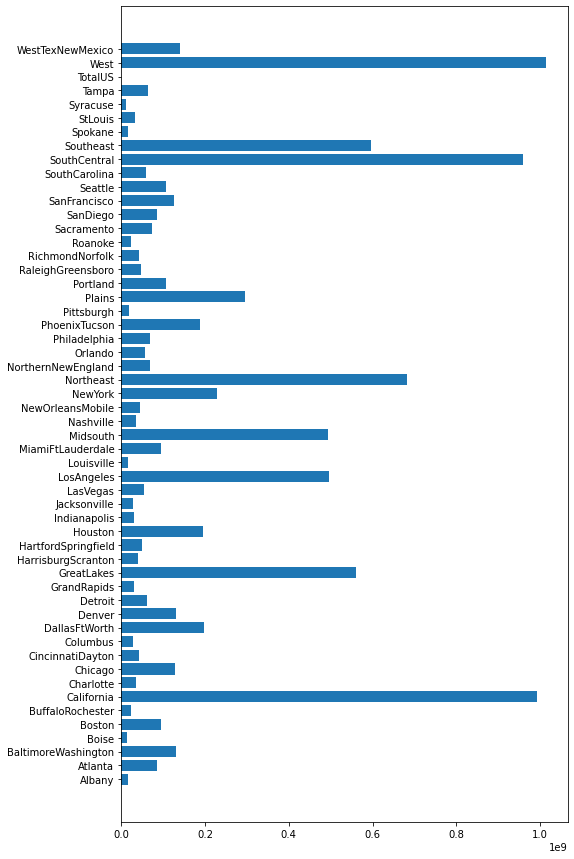

In [48]:
#4.3 part 1 Sum up the total volume of avocado sales by region and create a horizontal bar plot using
#Matplotlib. Which state from the region has the highest sales of avocados by volume? Subset the
#data for that state, create a histogram of average price and interpret it. Obtain the correlation
#index between average price and total volume for that state, what do you find?
regvolume_df = avocado.groupby('Region', as_index=False)['TotalVolume'].sum()
fig = plt.figure(figsize = (8,15))
plt.barh(regvolume_df['Region'], regvolume_df['TotalVolume'])
plt.show()

In [ ]:
# interpretation 
#From the visual we can see that California has the highest sales by volume. 

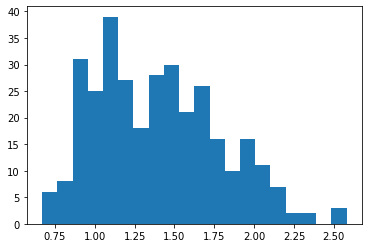

In [52]:
high_df = avocado[(avocado['Region'] =='California')]
fig = plt.figure()
plt.hist(high_df['AveragePrice'], bins=20)
plt.show()

In [54]:
#Looking at the correlation between avg price & total volumn
high_df['AveragePrice'].corr(high_df['TotalVolume'])

-0.7844641606204718

In [ ]:
#Interpretation 
#There is a strong negative correaltion which means as price goes down avocado sales go up in California

<AxesSubplot:xlabel='Date'>

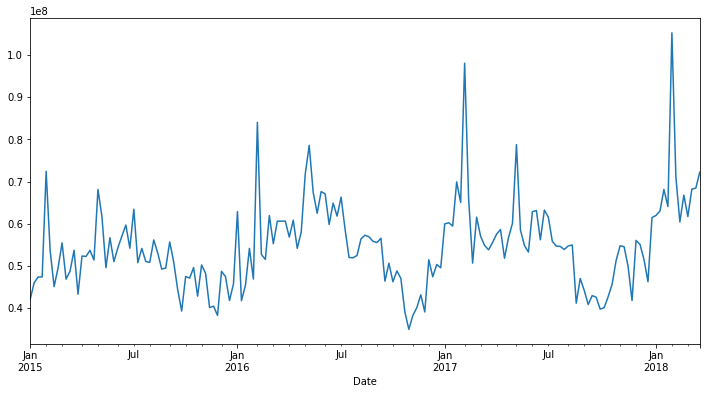

In [55]:
#4.4 part 1 Provide your observations of the following timeline plot of avocado sales
#by volume. Which month consistently has the highest volume of sales every year? In general, what
#could be some possible reasons driving this surge in sales?
timeline_df = avocado.groupby('Date')['TotalVolume'].sum()
fig = plt.figure(figsize = (12,6))
timeline_df.plot()


In [ ]:
#Interpretation 
The Data shows that the most sales usually occur during the month of February!